In [1]:
# Importar bibliotecas necessárias
import pandas as pd

# Caminho do arquivo no ambiente do Kaggle
file_path = '/kaggle/input/python-m10-support-material/Python_M10_support material.csv'

# Carregar os dados
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
data.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


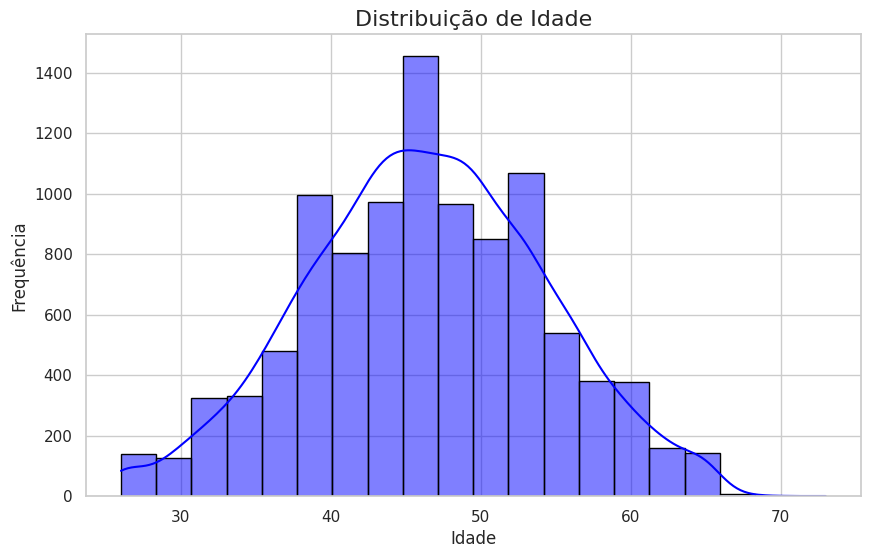

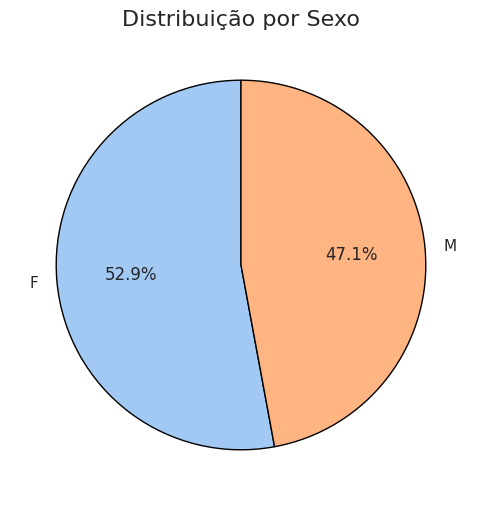

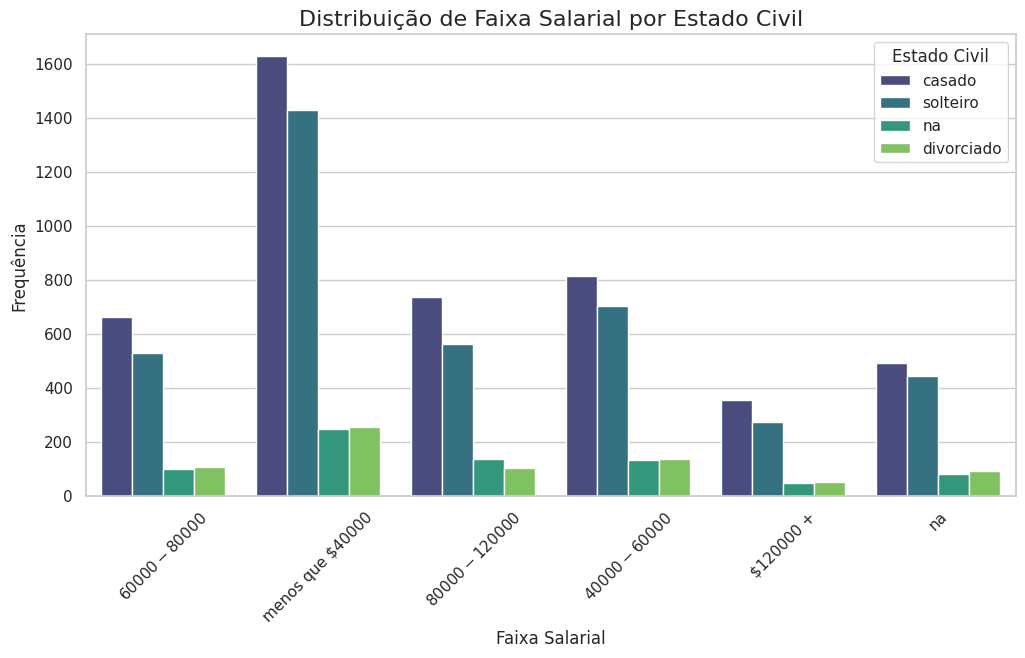

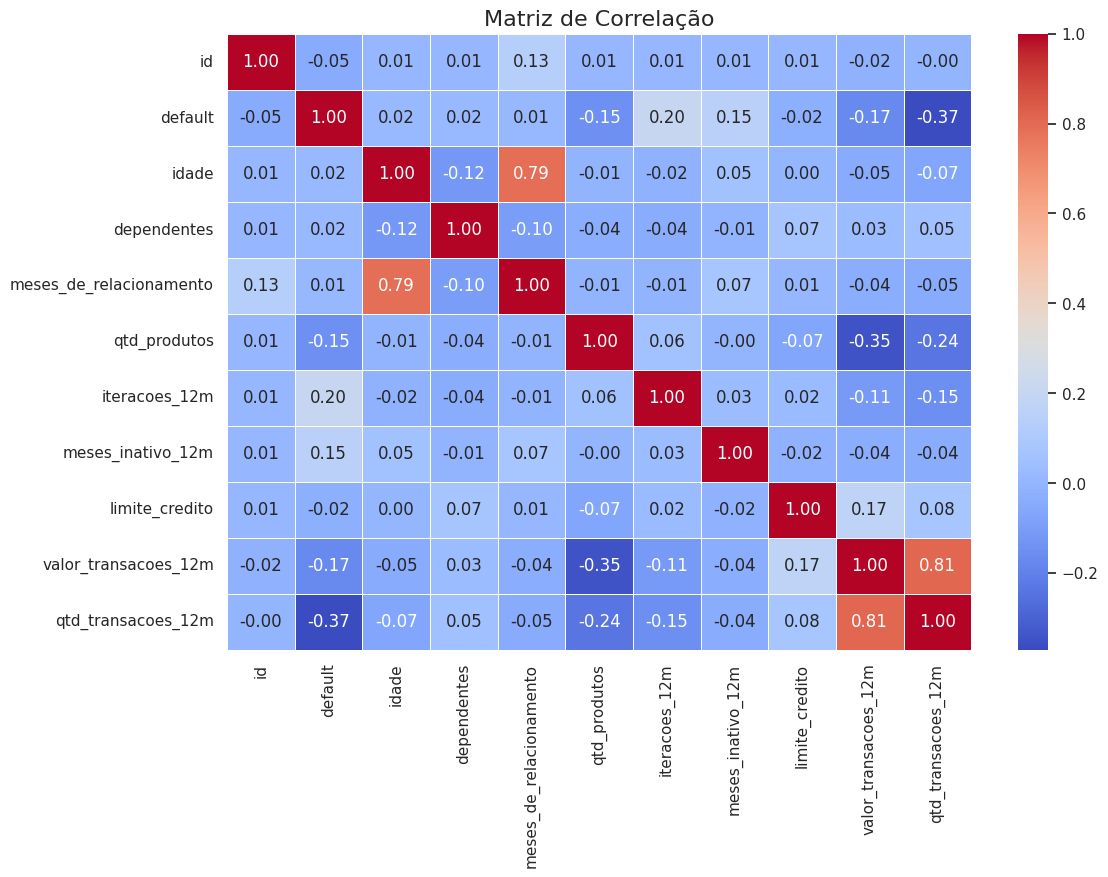

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
count,10127,10127,10127,10127,10127
unique,2,6,4,6,4
top,F,mestrado,casado,menos que $40000,blue
freq,5358,3128,4687,3561,9436


,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,8632.440165,4404.583047,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,9088.788041,3397.128078,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.000000,510.160000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.355000,2155.825000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.420000,3899.590000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11068.175000,4741.310000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.990000,18484.930000,139.000000


In [2]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo para os gráficos
sns.set(style="whitegrid")

# Caminho do arquivo no ambiente do Kaggle
file_path = '/kaggle/input/python-m10-support-material/Python_M10_support material.csv'

# Carregar os dados
data = pd.read_csv(file_path)

# Substituir a letra "K" por "000" na coluna 'salario_anual'
data['salario_anual'] = data['salario_anual'].str.replace('K', '000')

# Remover caracteres indesejados das colunas monetárias e convertê-las para numérico
data['limite_credito'] = data['limite_credito'].str.replace('.', '').str.replace(',', '.').astype(float)
data['valor_transacoes_12m'] = data['valor_transacoes_12m'].str.replace('.', '').str.replace(',', '.').astype(float)

# Excluindo espaços desnecessários nas colunas categóricas
categorical_columns = ['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.str.strip())

# Explorando dados categóricos
categorical_summary = data[categorical_columns].describe()

# Análise exploratória inicial
numeric_summary = data.describe()

# Visualização 1: Distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(data['idade'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribuição de Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

# Visualização 2: Proporção por sexo
plt.figure(figsize=(6, 6))
data['sexo'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'black'})
plt.title('Distribuição por Sexo', fontsize=16)
plt.ylabel('')
plt.show()

# Visualização 3: Faixa salarial por estado civil
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='salario_anual', hue='estado_civil', palette='viridis')
plt.title('Distribuição de Faixa Salarial por Estado Civil', fontsize=16)
plt.xlabel('Faixa Salarial', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Estado Civil')
plt.show()

# Selecionar apenas colunas numéricas para a matriz de correlação
numeric_data = data.select_dtypes(include='number')

# Visualização 4: Heatmap de correlação entre variáveis numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

# Exibir resumos descritivos
display(categorical_summary)
display(numeric_summary)